### Домашнее задание по статистическому анализу на python

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [182]:
#загрузить датасет по url
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context

# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать [по данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или [по ссылке](https://data.world/promptcloud/world-happiness-report-2019) в kaggle

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

* __Country (region)__ Name of the country.
* __Ladder__ Cantril Ladder is a measure of life satisfaction.
* __SD of Ladder__ Standard deviation of the ladder.
* __Positive affect__ Measure of positive emotion.
* __Negative affect__ Measure of negative emotion.
* __Social support__ The extent to which Social support contributed to the calculation of the Happiness Score.
* __Freedom__ The extent to which Freedom contributed to the calculation of the Happiness Score.
* __Corruption__ The extent to which Perception of Corruption contributes to Happiness Score.
* __Generosity__ The extent to which Generosity contributed to the calculation of the Happiness Score.
* __Log of GDP per capita__ The extent to which GDP contributes to the calculation of the Happiness Score.
* __Healthy life expectancy__ The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [183]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

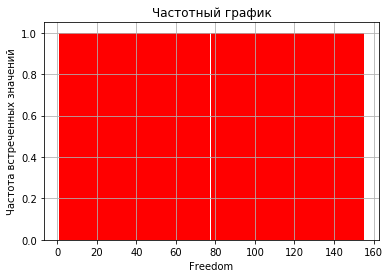

In [185]:
#не нагуглил что-то, можно ли на одну гистаграмму два параметра таких включить (но это кажется не очень осмысленным),
#так что построил два графика, все равно они одинаковые получаются — там и тут равномерное распределение

n, bins, patches = plt.hist(df['Freedom'], 156, facecolor='r')

plt.xlabel('Freedom')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

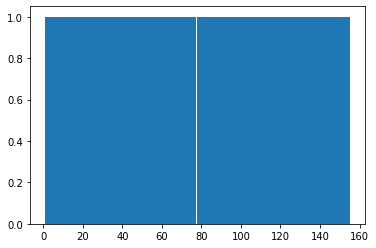

In [186]:
x = df['Positive affect']

plt.hist(x, 156)
plt.show()

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom


In [189]:
#сделал датасет без Катара, для которого большинство значений просто NaN — иначе среднее не считалось
#а мода считалась — для df с Катаром получается 71, а не 78

df1 = df.loc[df['Freedom'].notnull()]
len(df1)

155

In [190]:
#математическое ожидание (я так понимаю, в нашем случаее это и есть среднее)

print('Среднее значение: ', statistics.mean(df1['Freedom']))

Среднее значение:  78.0


In [191]:
print('Медиана: ', statistics.median(df1['Freedom']))

Медиана:  78.0


In [192]:
print('Мода: ', statistics.mode(df1['Freedom']))

StatisticsError: no unique mode; found 155 equally common values

In [193]:
print('Стандартное отклонение: ', statistics.pstdev(df1['Freedom']))

Стандартное отклонение:  44.74371464239419


In [194]:
print('Дисперсия: ', statistics.pvariance(df1['Freedom']))

Дисперсия:  2002.0


In [195]:
print('Минимум: ', min(df.Freedom))

Минимум:  1.0


In [196]:
print('Максимум: ', max(df.Freedom))

Максимум:  155.0


In [197]:
#выбросы - Катар с отсутствующими значениями

df.loc[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


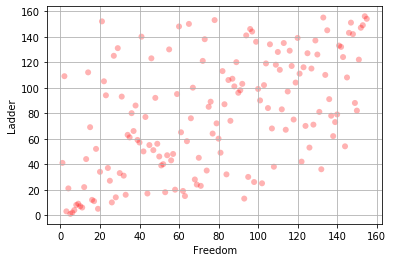

In [198]:
#вроде тут каких-то особенно заметных выборос не заметно (не уверен, что по y стоило брать именно Ladder, 
#но как-то более подходящего не придумал (это считай как по индексу тут))

fig, ax = plt.subplots()
ax.scatter(df.Freedom, df.Ladder, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

In [199]:
#Размах

freedom_range = max(df.Freedom) - min(df.Freedom)
freedom_range

154.0

Почему нельзя найти моду?

Видимо, потому что все значения в этой колонке уникальны

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

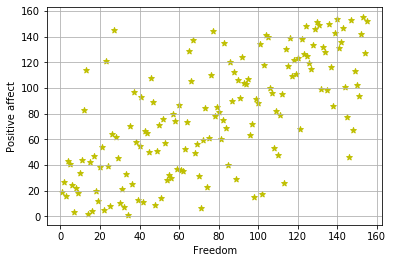

In [200]:
fig, ax = plt.subplots()
ax.scatter(df['Freedom'], df['Positive affect'], color='y', marker='*')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [201]:
from scipy.stats import pearsonr
x = df1.Freedom
y = df1['Positive affect']

Коэффициент корреляции Пирсона: 0.6817698430601657


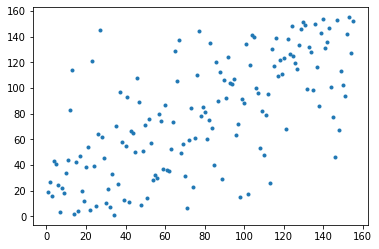

In [202]:
#чем ближе коэффициент к нолю, тем меньше коррелляционной зависимости между переменными, здесь она в общем-то есть
#знак положительный тут — получается, что при увеличении значения по свободе, увеличивается и значение по этому позитивному аффекту

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [203]:
#центрирование

freedom = df1['Freedom']
print(statistics.mean(freedom))

78.0


In [204]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [205]:
freedom_1.head()

0   -73.0
1   -72.0
2   -75.0
3   -71.0
4   -59.0
Name: Freedom, dtype: float64

In [206]:
#масштабирование

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы



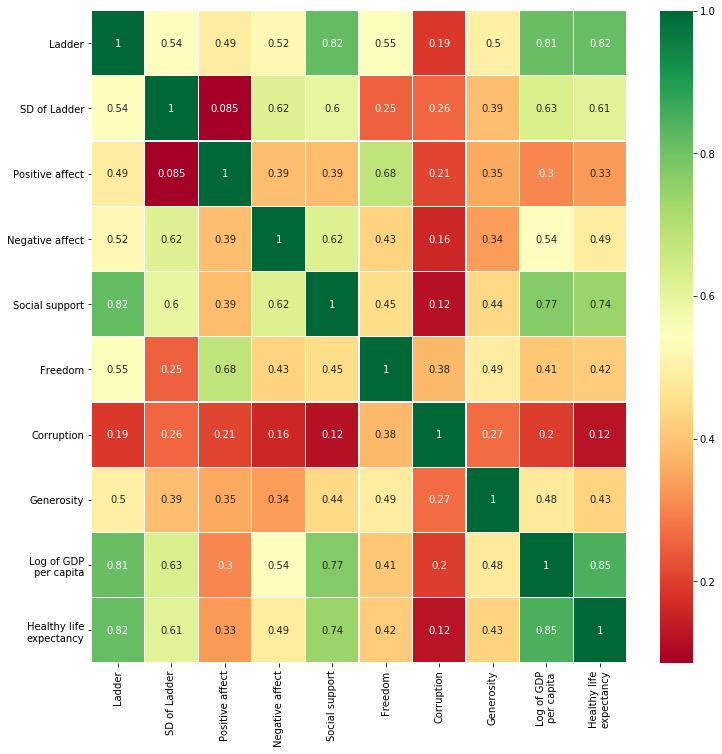

In [207]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо:

In [208]:
url="https://github.com/rtriangle/Netology-statistics/raw/master/data/avocado.csv"
df_avocado = pd.read_csv(url)

In [209]:
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

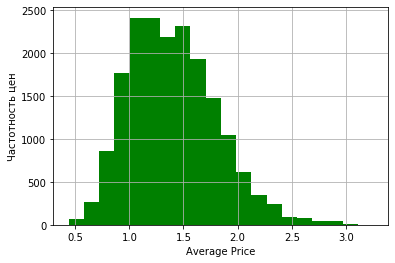

In [160]:
#нормальное распределение получается, вроде бы

n, bins, patches = plt.hist(df_avocado['AveragePrice'], 20, facecolor='g')

plt.grid(True)
plt.xlabel('Average Price')
plt.ylabel('Частотность цен')
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [174]:
#выделил эти колонки, чтобы построить матрицу корелляций. 

df_cut = df_avocado[['AveragePrice', '4046', '4770', '4225']]
df_cut.head()

,AveragePrice,4046,4770,4225
0,1.33,1036.74,48.16,54454.85
1,1.35,674.28,58.33,44638.81
2,0.93,794.70,130.50,109149.67
3,1.08,1132.00,72.58,71976.41
4,1.28,941.48,75.78,43838.39


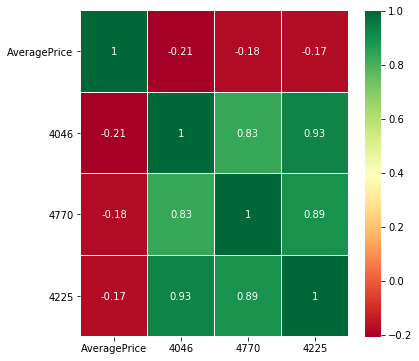

In [180]:
#виды явно корелляции между колонками 4046, 4225, 4770 - отсутствие их корелляции с ценой, значение одного показателя растет 
#вместе со значением другого
#но вот на счет выводов как-то сложно что-то сказать — мне неясно, что в эти колонки записано вообще


sns.heatmap(df_cut.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()